<a href="https://colab.research.google.com/github/dguevaraapaza/Micobiome-Project/blob/main/Project_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Install necessary packages
!pip install -q requests
!pip install -q beautifulsoup4
!pip install -q wget
!pip install -q missingno
!pip install -q pandas
!pip install -q numpy
!pip install -q matplotlib

In [4]:
import requests
from bs4 import BeautifulSoup
import wget
import os
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd


pd.set_option('display.max_rows', None)

In [5]:
# create metadata
!wget -q -O data/hmp2_metadata_2018-08-20.csv https://g-227ca.190ebd.75bc.data.globus.org/ibdmdb/metadata/hmp2_metadata_2018-08-20.csv

# work on this
metadata = pd.read_csv('data/hmp2_metadata_2018-08-20.csv')
metadata.head()

/tmp/ipykernel_146586/1878806604.py:5: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('data/hmp2_metadata_2018-08-20.csv')


,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [15]:
# Fix column labels
col_fixed = pd.DataFrame(
    {'old_names' : metadata.columns.tolist()}
)
col_fixed.to_csv("fix/label_correction.csv", index=False)

In [14]:
# check integrity per data type (collection)
print('Data Type View----------------------')
gb = metadata.groupby('data_type')
print(metadata.data_type.unique())
metad = [gb.get_group(x) for x in gb.groups]
print('------------------------------------')
print(metadata['data_type'].value_counts())

Data Type View----------------------
['biopsy_16S' 'host_genome' 'host_transcriptomics' 'metabolomics'
 'metagenomics' 'metatranscriptomics' 'methylome' 'proteomics' 'serology'
 'stool_16S' 'viromics']
------------------------------------
data_type
metagenomics            1638
metatranscriptomics      835
viromics                 703
metabolomics             546
proteomics               450
methylome                449
host_transcriptomics     252
serology                 210
stool_16S                180
biopsy_16S               178
host_genome               92
Name: count, dtype: int64


## 1. Metagenomics

In [85]:
# metagenomics
metagenomics = metad[4]
metagenomics.head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
1068,G79889,CSM5FZ3N_P,C3001,C3001C1,metagenomics,0.0,2014-03-14,0.0,4,ibdmdb,...,No,No,SM-5FZ3N,SM-5FZ3P,No,NaN,NaN,NaN,NaN,NaN
1069,G79894,CSM5FZ3R_P,C3001,C3001C2,metagenomics,2.0,2014-03-28,14.0,5,ibdmdb,...,No,No,SM-5FZ3R,SM-5UJBB,Yes,NaN,NaN,NaN,NaN,NaN
1070,G79903,CSM5YRY7_P,C3001,C3001C3,metagenomics,4.0,2014-04-15,18.0,6,ibdmdb,...,No,No,SM-5YRY7,SM-5YRY8,Yes,NaN,NaN,NaN,NaN,NaN
1071,G79913,CSM5FZ3V_P,C3001,C3001C4,metagenomics,6.0,2014-04-28,13.0,7,ibdmdb,...,No,No,SM-5FZ3V,SM-5FZ3W,Yes,NaN,NaN,NaN,NaN,NaN
1072,G79926,CSM5FZ4C_P,C3001,C3001C5,metagenomics,8.0,2014-05-09,11.0,8,ibdmdb,...,No,No,SM-5FZ4C,SM-5FZ4D,Yes,NaN,NaN,NaN,NaN,NaN


In [86]:
# trimming empty cols
temp = metagenomics.isna().sum().to_frame('missing_values').reset_index().rename(columns={'index':'cols'})
keep = temp.loc[temp['missing_values']!=metagenomics.shape[0]]
keep.to_csv('fix/metagenomics.csv', index=False)
old = keep.cols.tolist()
print(old)
print(len(old))

['Project', 'External ID', 'Participant ID', 'site_sub_coll', 'data_type', 'week_num', 'date_of_receipt', 'interval_days', 'visit_num', 'Research Project', 'PDO Number', 'GSSR IDs', 'Product', 'LCSET', 'Aggregated Lanes', 'WR ID', '# Lanes in Aggregation', 'reads_raw', 'reads_filtered', 'reads_qc_fail', 'reads_human', 'IntervalName', 'IntervalSequence', 'ProjectSpecificID', 'site_name', 'Age at diagnosis', 'Education Level', 'Occupation', 'Whole blood received at Broad:', 'Serum tube #1 received at CSMC:', 'Serum tubes #2-4 received at MGH:', 'FLora received at MGH:', 'RNA/DNA received at Broad:', 'ECP received at Washington U:', 'consent_age', 'diagnosis', 'Soft drinks, tea or coffee with sugar (corn syrup, maple syrup, cane sugar, etc)', 'Diet soft drinks, tea or coffee with sugar (Stevia, Equal, Splenda etc)', 'Fruit juice (orange, apple, cranberry, prune etc.)', 'Water', 'Alcohol (beer, brandy, spirits, hard liquor, wine, aperitif, etc.)', 'Yogurt or other foods containing active b

In [78]:
# Fix labels
fix_label = pd.read_csv('fix/metagenomics_fixlabel.csv')
new = fix_label.labels.tolist()
print(len(old))
print(len(new))

#  split and rename
metagenomics = metagenomics[old]
metagenomics = metagenomics.rename(columns=dict(zip(old, new)))
metagenomics.head()

165
165


,Proj,Ext_ID,Part_ID,site_coll,data_type,week_num,date_rcvd,interval_days,visit_num,Research_Proj,...,TubeA_Viromics,TubeB_Calpro,fecalcal,TubeB_Proteomics,Viromics_Baylor,FecalCal_MGH,Proteomics_LBNL,StoolID_TubeA,SampleID_TubeB,TubeAB_Broad
1068,G79889,CSM5FZ3N_P,C3001,C3001C1,metagenomics,0.0,2014-03-14,0.0,4,ibdmdb,...,SM-5QVZE,SM-5QVZI,193.89,SM-5QVZJ,No,No,No,SM-5FZ3N,SM-5FZ3P,No
1069,G79894,CSM5FZ3R_P,C3001,C3001C2,metagenomics,2.0,2014-03-28,14.0,5,ibdmdb,...,SM-5UKLB,SM-5UJNM,133.01,SM-5UJNN,No,No,No,SM-5FZ3R,SM-5UJBB,Yes
1070,G79903,CSM5YRY7_P,C3001,C3001C3,metagenomics,4.0,2014-04-15,18.0,6,ibdmdb,...,SM-5YSLQ,SM-5YSLS,198.84,SM-5YSLT,No,No,No,SM-5YRY7,SM-5YRY8,Yes
1071,G79913,CSM5FZ3V_P,C3001,C3001C4,metagenomics,6.0,2014-04-28,13.0,7,ibdmdb,...,SM-61GG5,SM-61GG7,46.86,SM-61GG8,No,No,No,SM-5FZ3V,SM-5FZ3W,Yes
1072,G79926,CSM5FZ4C_P,C3001,C3001C5,metagenomics,8.0,2014-05-09,11.0,8,ibdmdb,...,SM-64NAA,SM-64NAC,61.34,SM-64NAD,No,No,No,SM-5FZ4C,SM-5FZ4D,Yes


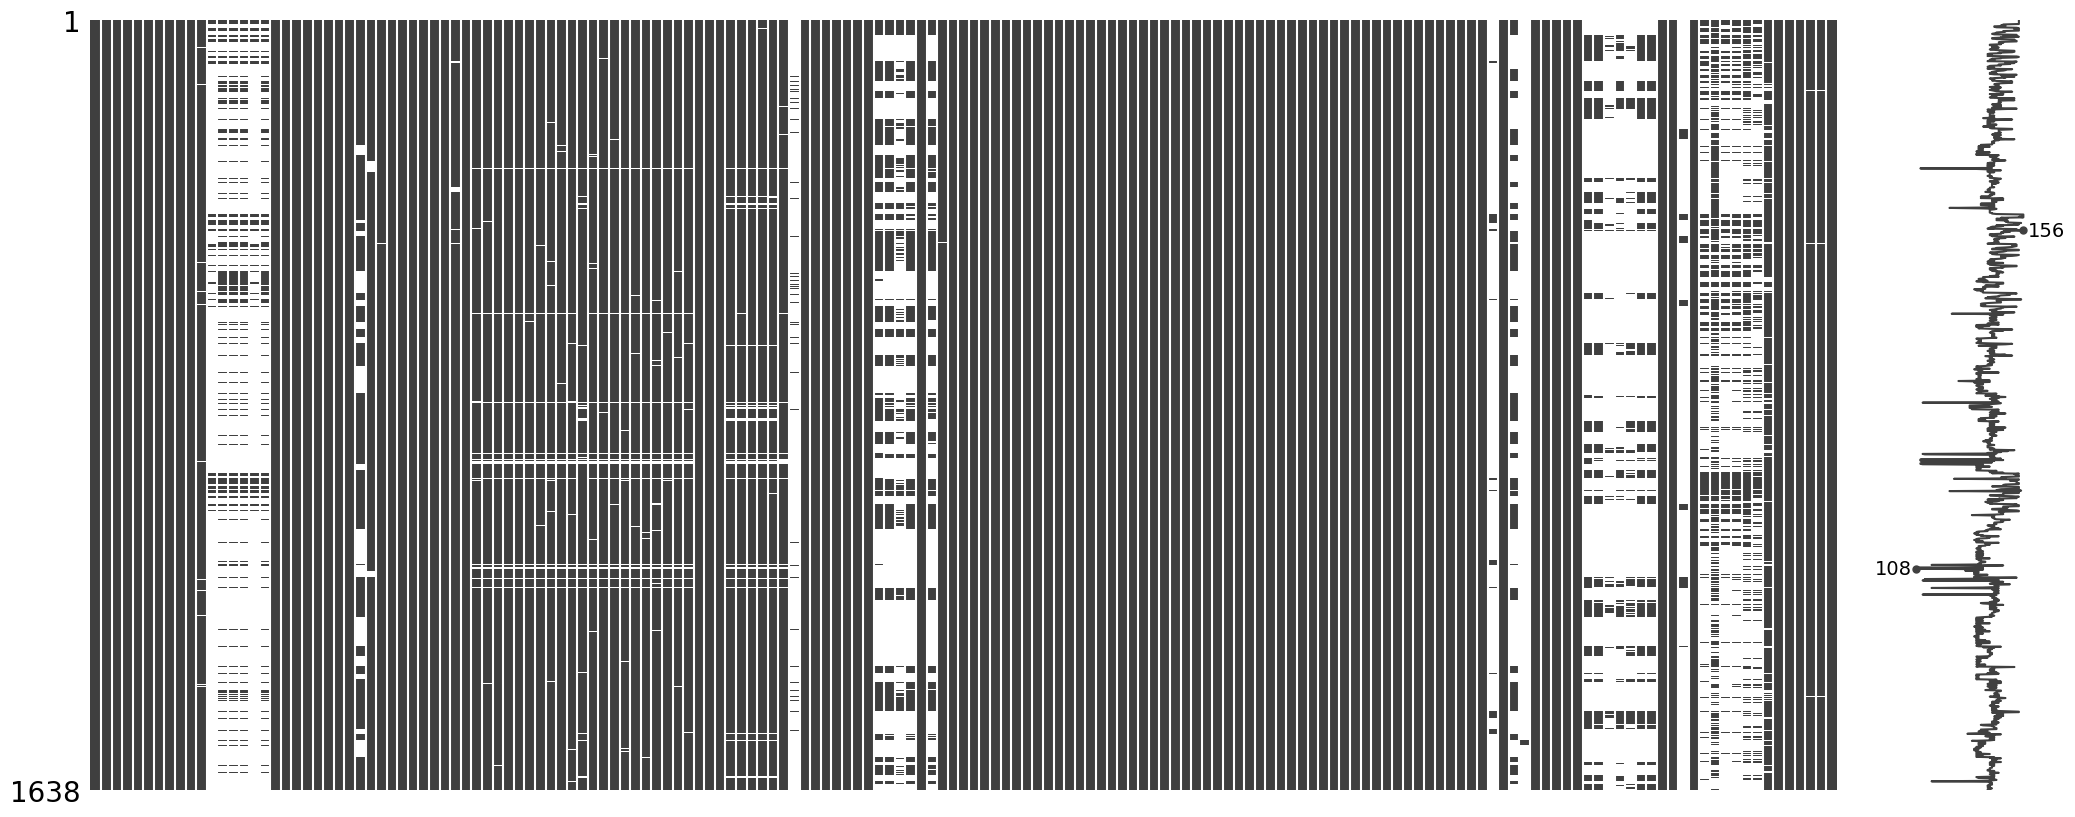

In [ ]:
# missing matrix
msno.matrix(metagenomics)
plt.show()

## 2. Metatranscriptomics

In [68]:
# metagenomics
metatranscriptomics = metad[5]
metatranscriptomics.head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
2706,G89308,CSM5FZ4C_P,C3001,C3001C5,metatranscriptomics,8.0,2014-05-09,11.0,8,ibdmdb,...,No,No,SM-5FZ4C,SM-5FZ4D,Yes,NaN,NaN,NaN,NaN,NaN
2707,G89338,CSM5MCVV_P,C3001,C3001C9,metatranscriptomics,16.0,2014-07-10,15.0,13,ibdmdb,...,No,No,SM-5MCVV,SM-5MCVW,No,NaN,NaN,NaN,NaN,NaN
2708,G89370,CSM5MCWI_P,C3001,C3001C10,metatranscriptomics,18.0,2014-07-22,12.0,14,ibdmdb,...,No,No,SM-5MCWI,SM-5MCWJ,No,NaN,NaN,NaN,NaN,NaN
2709,C3001C11_MTX,CSM5MCXD,C3001,C3001C11,metatranscriptomics,20.0,2014-08-05,14.0,15,ibdmdb,...,No,No,SM-5MCXD,SM-5MCXE,No,NaN,NaN,NaN,NaN,NaN
2710,C3001C15_MTX,CSM67UA2,C3001,C3001C15,metatranscriptomics,28.0,2014-09-30,13.0,20,ibdmdb,...,No,No,SM-67UA2,SM-67UA3,No,NaN,NaN,NaN,NaN,NaN


In [70]:
# trimming empty cols
temp = metatranscriptomics.isna().sum().to_frame('missing_values').reset_index().rename(columns={'index':'cols'})
keep = temp.loc[temp['missing_values']!=metatranscriptomics.shape[0]]
keep.to_csv('fix/metatranscriptomics.csv', index=False)
old = keep.cols.tolist()
print(old)
print(len(old))

['Project', 'External ID', 'Participant ID', 'site_sub_coll', 'data_type', 'week_num', 'date_of_receipt', 'interval_days', 'visit_num', 'Research Project', 'PDO Number', 'GSSR IDs', 'Product', 'LCSET', 'Aggregated Lanes', 'WR ID', '# Lanes in Aggregation', 'reads_raw', 'reads_filtered', 'reads_qc_fail', 'reads_human', 'reads_ribosomal', 'IntervalName', 'IntervalSequence', 'ProjectSpecificID', 'site_name', 'Age at diagnosis', 'Education Level', 'Occupation', 'Whole blood received at Broad:', 'Serum tube #1 received at CSMC:', 'Serum tubes #2-4 received at MGH:', 'FLora received at MGH:', 'RNA/DNA received at Broad:', 'ECP received at Washington U:', 'consent_age', 'diagnosis', 'Soft drinks, tea or coffee with sugar (corn syrup, maple syrup, cane sugar, etc)', 'Diet soft drinks, tea or coffee with sugar (Stevia, Equal, Splenda etc)', 'Fruit juice (orange, apple, cranberry, prune etc.)', 'Water', 'Alcohol (beer, brandy, spirits, hard liquor, wine, aperitif, etc.)', 'Yogurt or other foods 

In [71]:
# Fix labels
fix_label = pd.read_csv('fix/metatranscriptomics_fix_label.csv')
new = fix_label.labels.tolist()
print(len(old))
print(len(new))

#  split and rename
metatranscriptomics = metatranscriptomics[old]
metatranscriptomics = metatranscriptomics.rename(columns=dict(zip(old, new)))
metatranscriptomics.head()

165
165


,Proj,Ext_ID,Part_ID,site_sub_coll,data_type,week_num,date_receipt,interval_days,visit_num,Res_Project,...,TubeA_Viromics,TubeB_FecalCal,fecalcal,TubeB_Proteomics,Viromics_Baylor,FecalCal_MGH,Proteomics_LBNL,Stool_ID_TubeA,Sample_ID_TubeB,TubeAB_Broad
2706,G89308,CSM5FZ4C_P,C3001,C3001C5,metatranscriptomics,8.0,2014-05-09,11.0,8,ibdmdb,...,SM-64NAA,SM-64NAC,61.3400,SM-64NAD,No,No,No,SM-5FZ4C,SM-5FZ4D,Yes
2707,G89338,CSM5MCVV_P,C3001,C3001C9,metatranscriptomics,16.0,2014-07-10,15.0,13,ibdmdb,...,SM-6MYZ3,SM-6N1G6,115.2700,SM-6N1G7,No,No,No,SM-5MCVV,SM-5MCVW,No
2708,G89370,CSM5MCWI_P,C3001,C3001C10,metatranscriptomics,18.0,2014-07-22,12.0,14,ibdmdb,...,SM-6QU1N,SM-6QU52,146.8200,SM-6QU53,No,No,No,SM-5MCWI,SM-5MCWJ,No
2709,C3001C11_MTX,CSM5MCXD,C3001,C3001C11,metatranscriptomics,20.0,2014-08-05,14.0,15,ibdmdb,...,SM-6UG78,SM-6UG7R,NaN,SM-6UG7S,No,No,No,SM-5MCXD,SM-5MCXE,No
2710,C3001C15_MTX,CSM67UA2,C3001,C3001C15,metatranscriptomics,28.0,2014-09-30,13.0,20,ibdmdb,...,SM-71WY3,SM-71T4I,23.2035,SM-71T4J,No,No,No,SM-67UA2,SM-67UA3,No


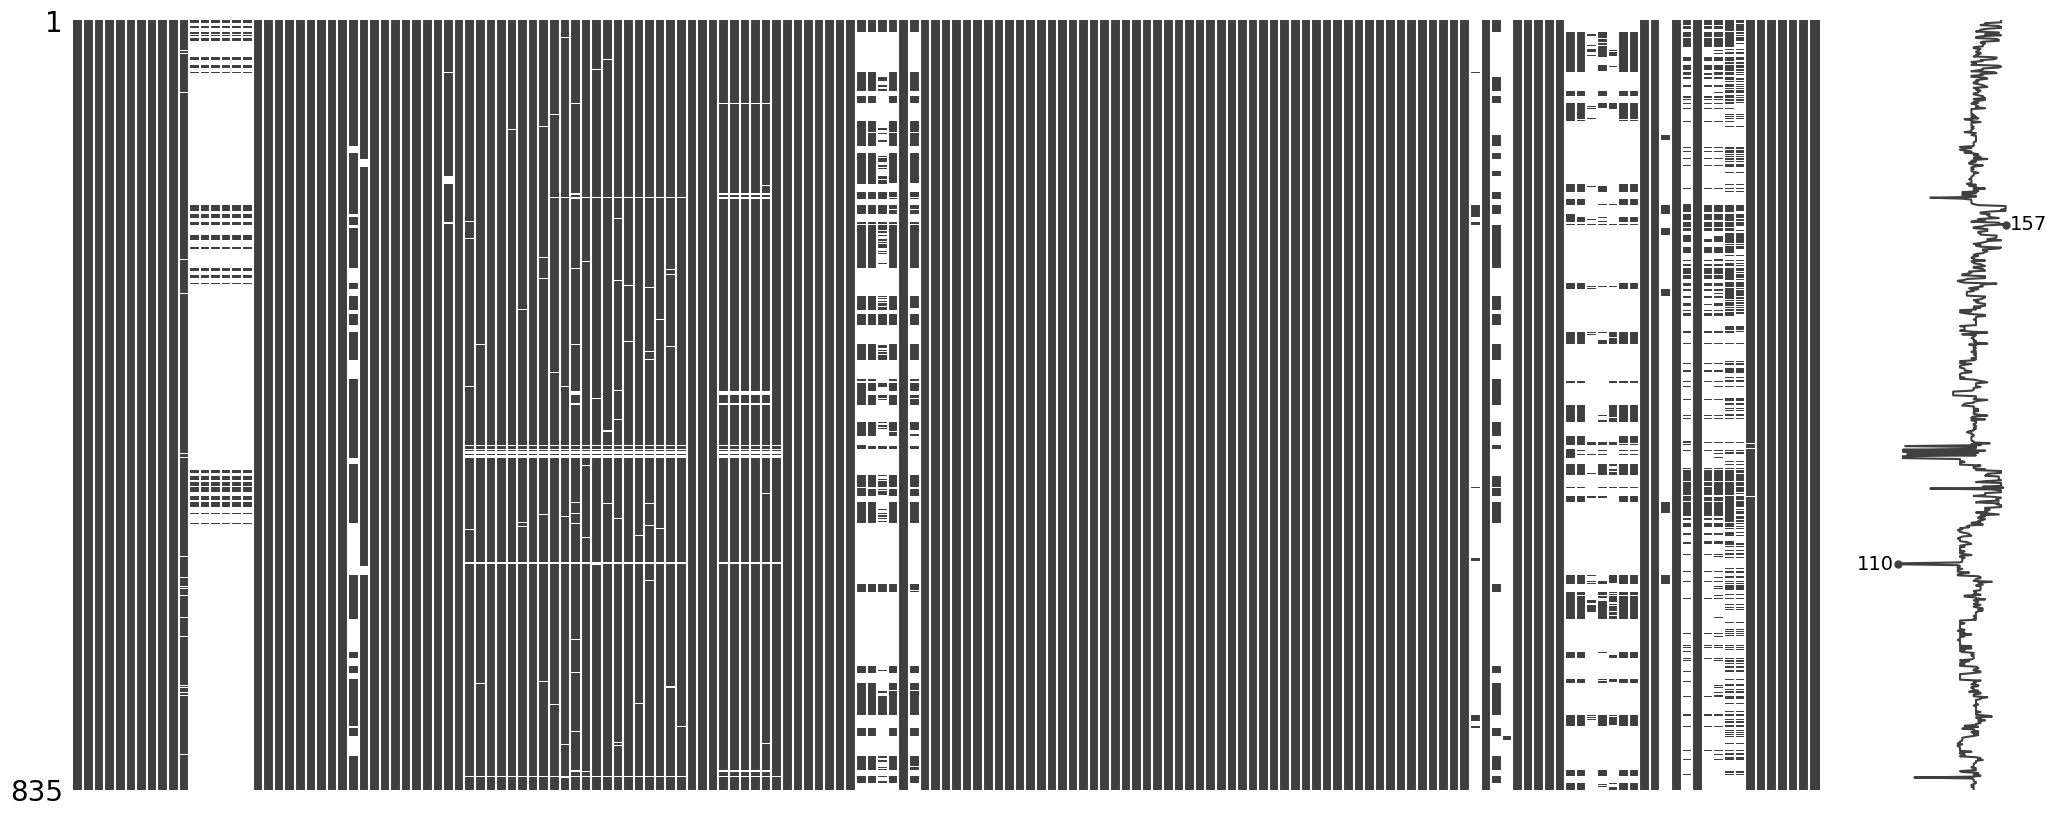

In [72]:
# missing matrix
msno.matrix(metatranscriptomics)
plt.show()

## 3. Viromics

In [81]:
# viromics
viromics = metad[10]
viromics.head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
4830,C3001C11_MVX,CSM5MCXD,C3001,C3001C11,viromics,20.0,2014-08-05,14.0,15,ibdmdb,...,No,No,SM-5MCXD,SM-5MCXE,No,NaN,NaN,NaN,NaN,NaN
4831,C3001C15_MVX,CSM67UA2,C3001,C3001C15,viromics,28.0,2014-09-30,13.0,20,ibdmdb,...,No,No,SM-67UA2,SM-67UA3,No,NaN,NaN,NaN,NaN,NaN
4832,C3001C20_MVX,CSM79HGP,C3001,C3001C20,viromics,38.0,2014-12-10,15.0,26,ibdmdb,...,No,No,SM-79HGP,SM-79HGQ,No,NaN,NaN,NaN,NaN,NaN
4833,C3002C9_MVX,CSM5MCVN,C3002,C3002C9,viromics,16.0,2014-08-19,13.0,13,ibdmdb,...,No,No,SM-5MCVN,SM-5MCVO,No,NaN,NaN,NaN,NaN,NaN
4834,C3002C14_MVX,CSM67UBH,C3002,C3002C14,viromics,26.0,2014-10-28,13.0,19,ibdmdb,...,No,No,SM-67UBH,SM-67UBI,No,NaN,NaN,NaN,NaN,NaN


In [82]:
# trimming empty cols
temp = viromics.isna().sum().to_frame('missing_values').reset_index().rename(columns={'index':'cols'})
keep = temp.loc[temp['missing_values']!=viromics.shape[0]]
keep.to_csv('fix/viromics.csv', index=False)
old = keep.cols.tolist()
print(old)
print(len(old))

['Project', 'External ID', 'Participant ID', 'site_sub_coll', 'data_type', 'week_num', 'date_of_receipt', 'interval_days', 'visit_num', 'Research Project', 'reads_raw', 'reads_filtered', 'reads_qc_fail', 'reads_viral', 'IntervalName', 'IntervalSequence', 'ProjectSpecificID', 'site_name', 'Age at diagnosis', 'Education Level', 'Occupation', 'Whole blood received at Broad:', 'Serum tube #1 received at CSMC:', 'Serum tubes #2-4 received at MGH:', 'FLora received at MGH:', 'RNA/DNA received at Broad:', 'ECP received at Washington U:', 'consent_age', 'diagnosis', 'Soft drinks, tea or coffee with sugar (corn syrup, maple syrup, cane sugar, etc)', 'Diet soft drinks, tea or coffee with sugar (Stevia, Equal, Splenda etc)', 'Fruit juice (orange, apple, cranberry, prune etc.)', 'Water', 'Alcohol (beer, brandy, spirits, hard liquor, wine, aperitif, etc.)', 'Yogurt or other foods containing active bacterial cultures (kefir, sauerkraut)', 'Dairy (milk, cream, ice cream, cheese, cream cheese)', 'Prob

In [ ]:
# Fix labels
fix_label = pd.read_csv('fix/metatranscriptomics_fix_label.csv')
new = fix_label.labels.tolist()
print(len(old))
print(len(new))

#  split and rename
metatranscriptomics = metatranscriptomics[old]
metatranscriptomics = metatranscriptomics.rename(columns=dict(zip(old, new)))
metatranscriptomics.head()

In [ ]:
# biopsy_16S
biopsy_16S = metad[0]
biopsy_16S.head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [ ]:
# trimming empty cols
temp = biopsy_16S.isna().sum().to_frame('missing_values').reset_index().rename(columns={'index':'cols'})
remove = temp.loc[temp['missing_values']>=100]
remove = remove.cols.tolist()

# split and remove
biopsy_16S = biopsy_16S.drop(columns=remove)
biopsy_16S.head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,visit_num,Research Project,IntervalName,IntervalSequence,...,Left Colon.3,Rectum.3,Total.3,SES-CD Score,Partial Endoscopy.1,sex,Viromics received at Baylor:,FecalCal received at MGH:,Proteomics received at LBNL:,Tube A and B received at Broad:
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No


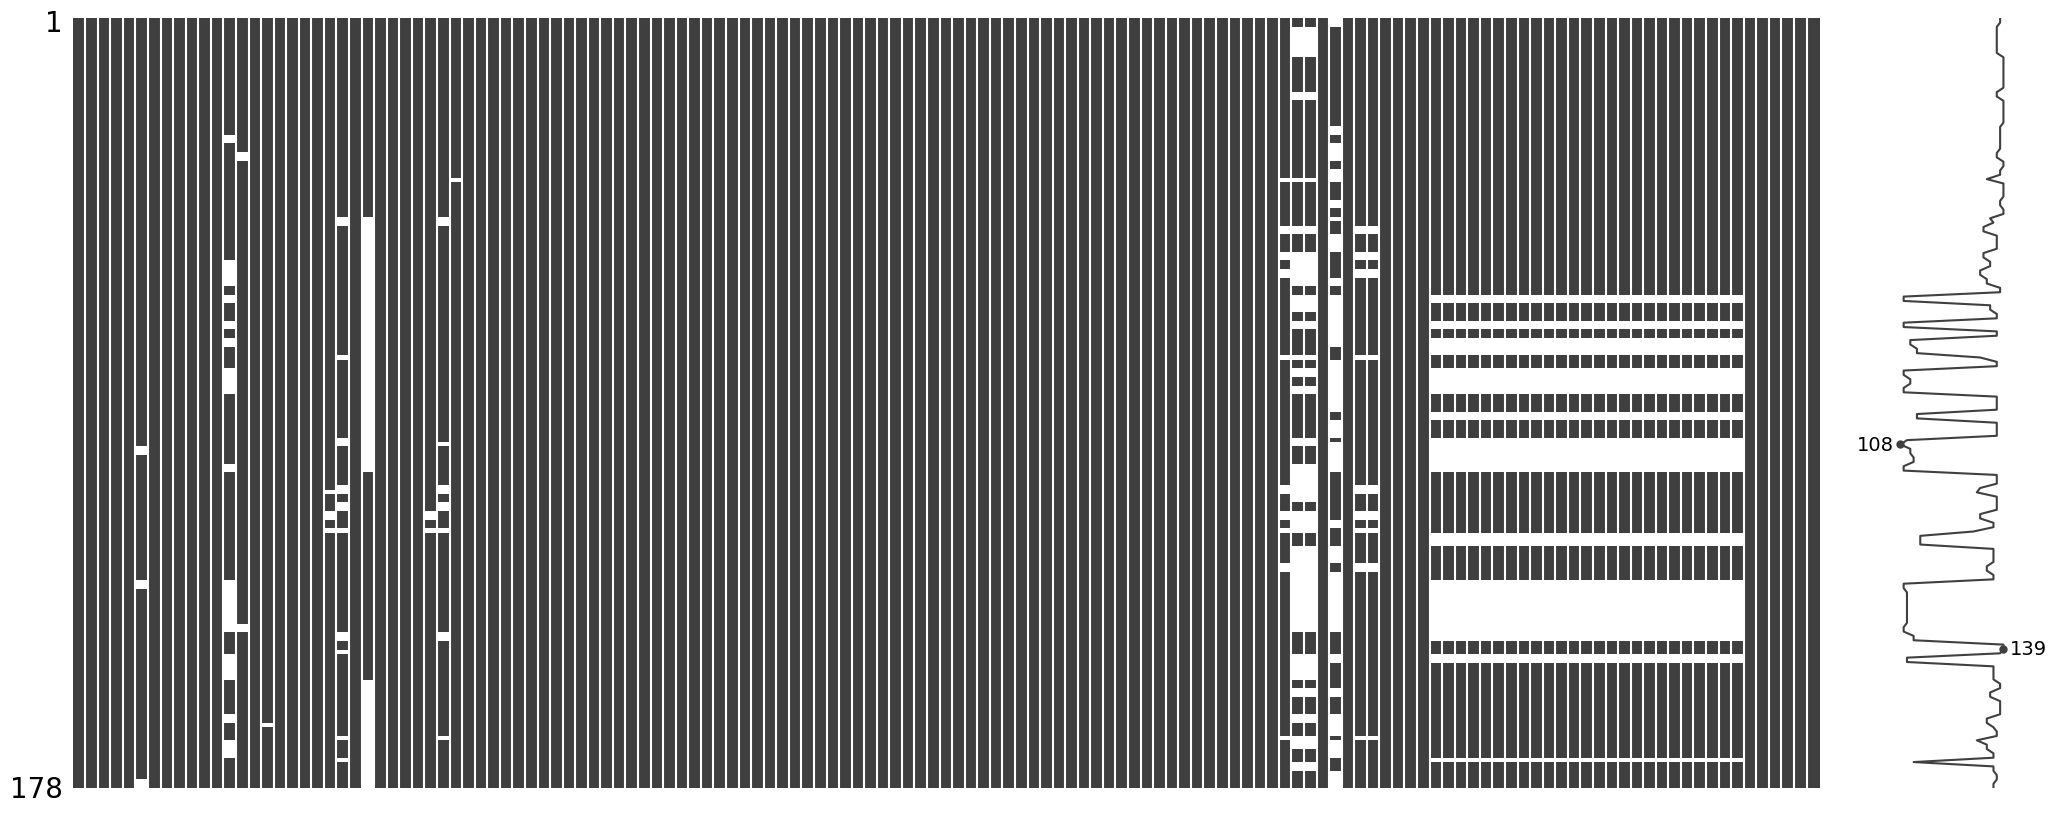

In [ ]:
msno.matrix(biopsy_16S)
plt.show()

In [ ]:
(metadata.dtypes.index.tolist())

['Project',
 'External ID',
 'Participant ID',
 'site_sub_coll',
 'data_type',
 'week_num',
 'date_of_receipt',
 'interval_days',
 'visit_num',
 'Research Project',
 'PDO Number',
 'GSSR IDs',
 'Product',
 'LCSET',
 'Aggregated Lanes',
 'WR ID',
 '# Lanes in Aggregation',
 'reads_raw',
 'reads_filtered',
 'reads_qc_fail',
 'reads_human',
 'reads_ribosomal',
 'reads_viral',
 'Delta',
 'IntervalName',
 'IntervalSequence',
 'ProjectSpecificID',
 'site_name',
 'Age at diagnosis',
 'Has the subject had a cholecystectomy?',
 'Has the subject had a prior abdominal surgery (other)?',
 'Has the next visit been scheduled?',
 'Has the subject been given new stool kits?',
 'Has the subject completed the FFQ/YAQ?',
 'Education Level',
 'Occupation',
 'Scanned FFQ/YAQ document:',
 'FFQ/YAQ results:',
 'Has the subject had an appendectomy?',
 'Has the subject had a tonsillectomy?',
 'biopsy_location',
 'Were study bloods drawn?',
 'Whole blood received at Broad:',
 'Serum tube #1 received at CSMC:',


In [ ]:
# turn FASTQ files containing our data into QIIME artifacts
!qiime tools import \
  --type 'SampleData[SequencesWithQuality]' \
  --input-path manifest.tsv \
  --output-path sequences.qza \
  --input-format SingleEndFastqManifestPhred33V2

Imported manifest.tsv as SingleEndFastqManifestPhred33V2 to sequences.qza


In [ ]:
# QIIME to visualize our sequencing data.
!qiime demux summarize \
--i-data sequences.qza \
--o-visualization qualities.qzv

Saved Visualization to: qualities.qzv


In [ ]:
# Quality Filtering: From Sequence to ASV
!qiime dada2 denoise-single \
    --i-demultiplexed-seqs sequences.qza \
    --p-trunc-len 150 \
    --p-n-threads 2 \
    --output-dir dada --verbose

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada.R --input_directory /tmp/qiime2/root/data/61c306c7-0fdd-4ef8-9866-1948640a37db/data --output_path /tmp/tmp2y15him5/output.tsv.biom --output_track /tmp/tmp2y15him5/track.tsv --filtered_directory /tmp/tmp2y15him5 --truncation_length 150 --trim_left 0 --max_expected_errors 2.0 --truncation_quality_score 2 --max_length Inf --pooling_method independent --chimera_method consensus --min_parental_fold 1.0 --allow_one_off False --num_threads 2 --learn_min_reads 1000000 --homopolymer_gap_penalty NULL --band_size 16

Warning message:
package ‘optparse’ was built under R version 4.2.3 
R version 4.2.2 (2022-10-31) 
Loading required package: Rcpp
DADA2: 1.26.0 / Rcpp: 1.0.11 / RcppParallel: 5.1.6 
2) Filtering 


......................................

In [ ]:
!qiime metadata tabulate \
    --m-input-file dada/denoising_stats.qza \
    --o-visualization dada/denoising-stats.qzv

Saved Visualization to: dada/denoising-stats.qzv


## Phyllogenetics

In [ ]:
!qiime phylogeny align-to-tree-mafft-fasttree \
    --i-sequences dada/representative_sequences.qza \
    --output-dir tree

Saved FeatureData[AlignedSequence] to: tree/alignment.qza
Saved FeatureData[AlignedSequence] to: tree/masked_alignment.qza
Saved Phylogeny[Unrooted] to: tree/tree.qza
Saved Phylogeny[Rooted] to: tree/rooted_tree.qza


In [ ]:
!qiime empress tree-plot \
    --i-tree tree/rooted_tree.qza \
    --o-visualization tree/empress.qzv

Saved Visualization to: tree/empress.qzv


## Diversity

In [ ]:
!qiime diversity core-metrics-phylogenetic \
    --i-table dada/table.qza \
    --i-phylogeny tree/rooted_tree.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file metadata.tsv \
    --output-dir diversity

There was an issue with loading the file metadata.tsv as metadata:

  Metadata file path doesn't exist, or the path points to something other than a file. Please check that the path exists, has read permissions, and points to a regular file (not a directory): metadata.tsv

  There may be more errors present in the metadata file. To get a full report, sample/feature metadata files can be validated with Keemei: https://keemei.qiime2.org

  Find details on QIIME 2 metadata requirements here: https://docs.qiime2.org/2023.9/tutorials/metadata/



In [ ]:
# from google.colab import files
# import shutil

# # # Zip the directory
# # shutil.make_archive('./content', 'zip', './content')

# # Download the zipped file
# files.download('./content.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>